<a href="https://colab.research.google.com/github/canasep/mack_projeto1/blob/main/codes/PROJETO_APLICADO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


LINK COLLAB AO GITHUB

In [134]:
# NESTA ETAPA IREMOS CLONAR O GITHUB NO COLLAB

!git clone https://github.com/canasep/mack_projeto1.git


fatal: destination path 'mack_projeto1' already exists and is not an empty directory.


**CRIAÇÃO DO DATASET A PARTIR DO CSV CRÚ**

In [135]:
# IMPORTAMÇÃO DO CSV E CRIAÇÃO DO DATASET

## IMPORTANDO PACOTE PANDAS
import pandas as pd

## CAMINHO DO ARQUIVO
file_path = '/content/mack_projeto1/dataset/arquivos/RAW.csv'

## CODIGO DE IMPORTAÇÃO E CRIAÇÃO DO DATASET DF
try:
  df = pd.read_csv(file_path)
  print("Dataset created successfully!")
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")




Dataset created successfully!


**IMPRESSÃO DO HEAD DO DATASET DF**

In [136]:
# IMPRESSÃO DO HEAD DO DATASET DF

df.head()


,loja,tipo,Shopping,software,data_assinado,data_entregue,data_primeiro_pedido,Irregular,pedidos_m0,pedidos_m1,pedidos_m2
0,Loja - 01,Lanches,Não,ANOTA,09/07/2024,19/08/2024,03/10/2024,NaN,2,0,0
1,Loja - 02,Hamburgueria / Hot Dog,Não,ANOTA,09/07/2024,18/07/2024,14/08/2024,NaN,101,251,187
2,Loja - 03,Hamburgueria / Hot Dog,Não,ANOTA,09/07/2024,18/07/2024,28/08/2024,NaN,16,71,113
3,Loja - 04,Hamburgueria / Hot Dog,Não,ANOTA,10/07/2024,23/08/2024,20/09/2024,NaN,10,18,19
4,Loja - 05,Hamburgueria / Hot Dog,Não,ANOTA,12/07/2024,27/07/2024,29/08/2024,NaN,20,112,85


**QUANTIDADE DE RESTAURANTES A SEREM ANALISADOS NO DATASET**

In [137]:

# QUANTIDADE DE RESTAURANTES ANALISADOS

### IMPRESSÃO
print("QUANTIDADE DE RESTAURANTE NO DATASET", len(df))


QUANTIDADE DE RESTAURANTE NO DATASET 481


**CONTAGEM DE INSTÂNCIAS EM ATRIBUTO 'TIPO' DE RESTAURANTE**


In [138]:
# CONTAGEM DE 'INSTANCIAS EM ATRIBUTO TIPO' E CRIAÇÃO DA TABELA COM ATRIBUTO 'TIPO'

## CRIAÇÃO DA TABELA 'TIPO'
tipo_restaurante_counts = df['tipo'].value_counts()

## CRIAÇÃO TABELA 'TIPO'
tipo_restaurante_counts

,count
tipo,
Hamburgueria / Hot Dog,128
Pizzaria,69
Desconhecido,59
Açaí,27
Lanches,25
Pastel,25
Carnes,22
Japonesa,19
Esfiha,15


**LIMPEZA E NORMALIZAÇÃO DE DADOS A PARTIR DAS INSTÂNCIAS ENCONTRADAS EM ATRIBUTO 'TIPO'**

Encontramos algumas instâncias semelhantes que devem ser unificadas para um melhor entendimento dos dados.

Alguns exemplos são:
"Hamburgueria / Hotdog" e "Hamburguer / Hotdog"
"Japonesa", "Asiática / Japonesa" e "Sushi"


In [139]:
# LIMPEZA E NORMALIZAÇÃO DE DADOS A PARTIR DAS INSTÂNCIAS ENCONTRADAS EM ATRIBUTO 'TIPO'

### ENCONTRAMOS ALGUMAS INSTANCIAS SEMELHANTES QUE DEVEM SER UNIFICADAS

### Alguns exemplos são:
### "Hamburgueria / Hotdog" e "Hamburguer / Hotdog"
### "Japonesa", "Asiática / Japonesa" e "Sushi"

# CODIGO PARA UNIFICAÇÃO DOS DADOS

## UNIFICAÇÃO DE DADOS EM "HAMBURGUERIA / HOTDOG"
df['tipo'] = df['tipo'].replace(['Hamburgueria / Hot Dog', 'Lanches', 'Hamburguer / Hot Dog', 'Hamburguer'], 'Hamburgueria / Hot Dog')

## UNIFICAÇÃO DE DADOS EM "JAPONESA"
df['tipo'] = df['tipo'].replace(['Japonesa','Sushi','Asiática / Japonesa'], 'Asiática / Japonesa')

## UNIFICAÇÃO DE DADOS EM "ÁRABE"
df['tipo'] = df['tipo'].replace(['Árabe', 'Esfiha'], 'Árabe')

**CONTAGEM DE INSTÂNCIAS EM ATRIBUTO 'TIPO' DE RESTAURANTE COM OS DADOS NORMALIZADOS**

In [140]:
# CONTAGEM DE INSTÂNCIAS EM ATRIBUTO 'TIPO' DE RESTAURANTE COM OS DADOS NORMALIZADOS

## CRIAÇÃO DA TABELA COM A QUANTIDADE DE RESTAURANTES EM CADA TIPO
restaurant_counts = df.groupby('tipo')['tipo'].count()

## ORGANIZAÇÃO DOS DADOS EM ORDEM DECRESCENTE
sorted_restaurant_counts = restaurant_counts.sort_values(ascending=False)

## IMPRESSÃO DA TABELA COM A QUANTIDADE DE RESTAURANTES EM CADA 'TIPO' EM ORDEM DECRESCENTE
sorted_restaurant_counts



,tipo
tipo,
Hamburgueria / Hot Dog,156
Pizzaria,69
Desconhecido,59
Açaí,27
Pastel,25
Asiática / Japonesa,23
Carnes,22
Árabe,20
Tradicional,15


**CRIAÇÃO DO GRÁFICO DE SEGMENTOS**

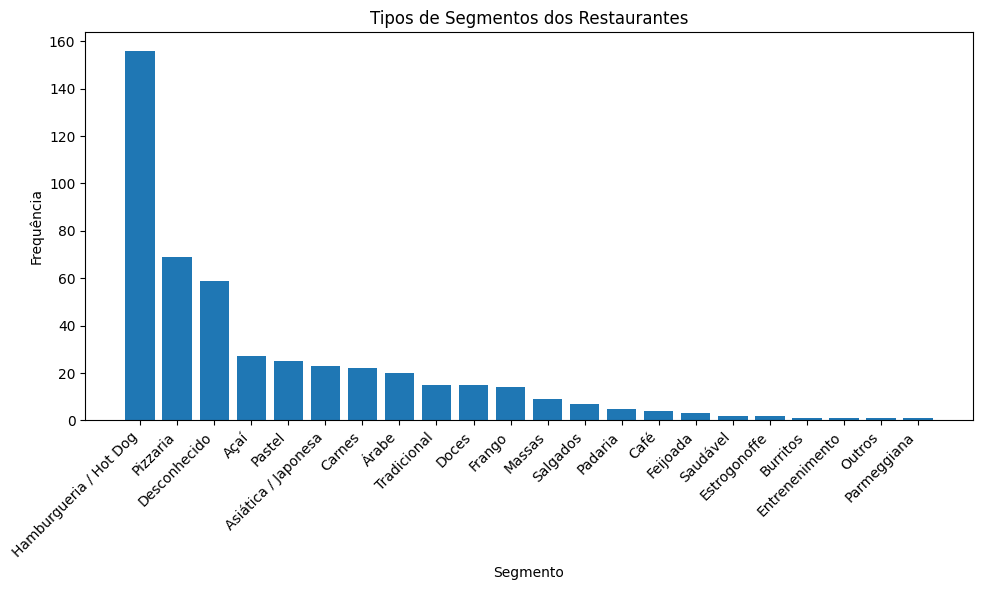

In [141]:
# IMPORTAÇÃO DA BIBLIOTECA MATPLOTLIB.PYPLOT
import matplotlib.pyplot as plt

# CRIAÇÃO DO GRÁFICO DE BARRAS

## TAMANHO DA IMAGEM
plt.figure(figsize=(10, 6))

## DADOS PARA O GRÁFICO E TIPO DE GRÁFICO - BARRAS
plt.bar(sorted_restaurant_counts.index, sorted_restaurant_counts.values)

## LABELS
plt.xlabel('Segmento')
plt.ylabel('Frequência')
plt.title('Tipos de Segmentos dos Restaurantes')

### ROTAÇÃO DOS RÓTULOS DO EIXO X PARA MELHOR VISUALIZAÇÃO
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### IMPRESSÃO DO GRÁFICO DE BARRAS
plt.show()


**CRIAÇÃO DE TABELAS COM ATRIBUTO 'SHOPPING'**

Contagem das lojas que estão dentro de Shopping

In [142]:
# CRIAÇÃO DE TABELAS COM ATRIBUTO 'SHOPPING'

## CRIAÇÃO DA TABELA COM A QUANTIDADE DE RESTAURANTES EM CADA LOCALIZAÇÃO, SE DENTRO OU FORA DE SHOPPING
shopping_counts = df.groupby('Shopping')['Shopping'].count()

## ORGANIZAÇÃO DOS DADOS EM ORDEM DECRESCENTE
shopping_counts_sorted = shopping_counts.sort_values(ascending=False)

## IMPRESSÃO DA TABELA COM A QUANTIDADE DE RESTAURANTES EM CADA LOCALIZAÇÃO, SE DENTRO OU FORA DE SHOPPING, EM ORDEM DECRESCENTE
shopping_counts_sorted

,Shopping
Shopping,
Não,465
Sim,16


**CRIAÇÃO DO DIAGRAMA DE SETORES COM A A QUANTIDADE DE RESTAURANTES EM CADA LOCALIZAÇÃO, SE DENTRO OU FORA DE SHOPPING**

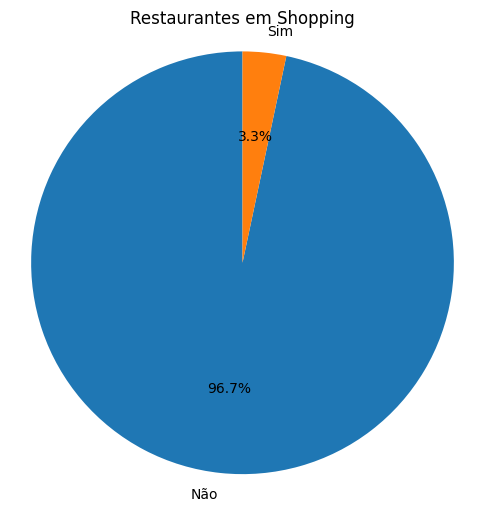

In [143]:
# CRIAÇÃO DO DIAGRAMA DE SETORES COM A QUANTIDADE DE RESTAURANTES EM CADA LOCALIZAÇÃO, SE DENTRO OU FORA DE SHOPPING

## TAMANHO DA IMAGEM
plt.figure(figsize=(6, 6))

## DADOS PARA O GRÁFICO E TIPO DE GRÁFICO - PIE CHART
plt.pie(shopping_counts, labels=shopping_counts.index, autopct='%1.1f%%', startangle=90)

## LABELS
plt.title('Restaurantes em Shopping')
plt.axis('equal')

## IMPRESSÃO DO GRÁFICO
plt.show()


**QUANTIDADE DE PEDIDOS, DESVIO PADRÃO, MÍN, MÁX, QUARTIS E MÉDIA DOS ATRIBUTOS 'PEDIDOS_M0', 'PEDIDOS_M1', 'PEDIDOS_M2'**

Onde Pedidos_M0 é a quantidade de pedidos feitos no mês corrente da assinatura do contrato, Pedidos_M1 a quantidade de pedidos feitos no primeiro mês completo após a assinatura do contrato, e Pedidos_M2 é a quantidade de pedidos feitos no segundo mês completo depois da assinatura do contrato de implantação do serviço.

In [144]:
# QUANTIDADE DE PEDIDOS, DESVIO PADRÃO, MÍN, MÁX, QUARTIS E MÉDIA DOS ATRIBUTOS 'PEDIDOS_M0', 'PEDIDOS_M1', 'PEDIDOS_M2'

### Onde Pedidos_M0 é a quantidade de pedidos feitos no mês corrente da assinatura do contrato
### Pedidos_M1 a quantidade de pedidos feitos no primeiro mês completo após a assinatura do contrato
### Pedidos_M2 é a quantidade de pedidos feitos no segundo mês completo depois da assinatura do contrato de implantação do serviço.

### CALCULO DA MÉDIA
df['pedidos_m0'].mean()

### IMPRESSÃO DA TABELA DESCRITIVA
df.describe()


,pedidos_m0,pedidos_m1,pedidos_m2
count,481.000000,481.000000,481.000000
mean,57.862786,80.887734,53.632017
std,132.328922,205.875114,185.986972
min,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,12.000000,12.000000,0.000000
75%,50.000000,70.000000,23.000000
max,1832.000000,2838.000000,2659.000000


**CRIACAO DOS GRÁFICOS DE DISPERSÃO DOS ATRIBUTOS PEDIDOS_M0, PEDIDOS_M1 E PEDIDOS_M2**

Criação do gráfico de dispersão de Pedidos_M0

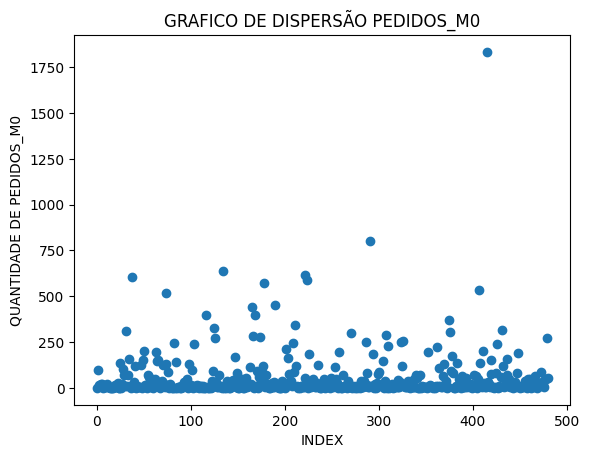

In [145]:
# CRIAÇÃO DOS GRAFICOS DE DISPERSÃO DOS ATRIBUTOS PEDIDOS_M0, PEDIDOS_M1 E PEDIDOS_M2

## GRAFICO DE DISPERSÃO PEDIDOS_M0

### CRIACAO DO GRAFICO DE DISPERSÃO PEDIDOS_M0
plt.scatter(df.index, df['pedidos_m0'])

### LABELS
plt.title('GRAFICO DE DISPERSÃO PEDIDOS_M0')
plt.xlabel('INDEX')
plt.ylabel('QUANTIDADE DE PEDIDOS_M0')

### IMPRESSÃO
plt.show()

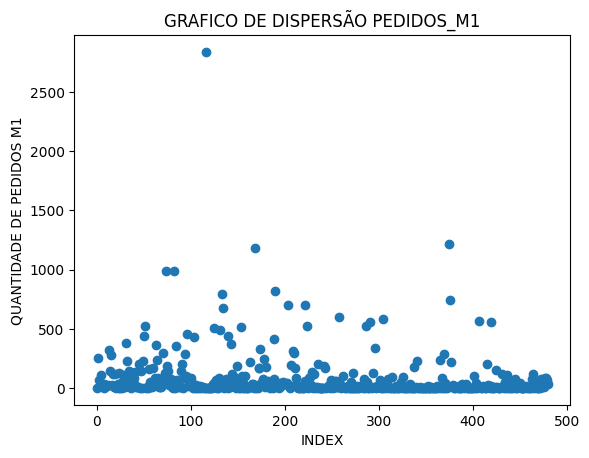

In [146]:
## GRAFICO DE DISPERSÃO PEDIDOS_M1

### CRIACAO DO GRAFICO DE DISPERSÃO PEDIDOS_M1
plt.scatter(df.index, df['pedidos_m1'])

### LABELS
plt.title('GRAFICO DE DISPERSÃO PEDIDOS_M1')
plt.xlabel('INDEX')
plt.ylabel('QUANTIDADE DE PEDIDOS M1')

### IMPRESSÃO
plt.show()

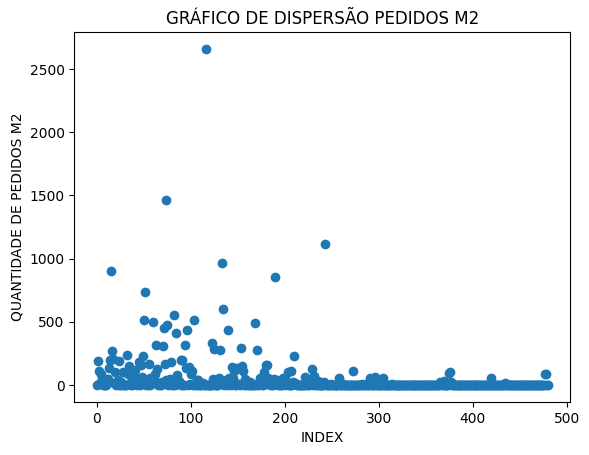

In [147]:
## GRAFICO DE DISPERSÃO PEDIDOS_M2

### CRIACAO DO GRAFICO DE DISPERSÃO PEDIDOS_M2
plt.scatter(df.index, df['pedidos_m2'])

### LABELS
plt.title('GRÁFICO DE DISPERSÃO PEDIDOS M2')
plt.xlabel('INDEX')
plt.ylabel('QUANTIDADE DE PEDIDOS M2')

### IMPRESSAO
plt.show()

**NORMALIZAÇÃO E PADRONIZAÇÃO DOS DADOS NOS ATRIBUTOS 'DATA_PRIMEIRO_PEDIDO', 'DATA_ENTREGUE' E 'DATA_ASSINADO'**

In [148]:
# NORMALIZAÇÃO E PADRONIZAÇÃO DOS DADOS NOS ATRIBUTOS 'DATA_PRIMEIRO_PEDIDO', 'DATA_ENTREGUE' E 'DATA_ASSINADO'

df['data_primeiro_pedido'] = pd.to_datetime(df['data_primeiro_pedido'], format='%d/%m/%Y')
df['data_entregue'] = pd.to_datetime(df['data_entregue'], format='%d/%m/%Y')
df['data_assinado'] = pd.to_datetime(df['data_assinado'], format='%d/%m/%Y')

**CONTAGEM DE RESTAURANTES COM PRIMEIRO PEDIDO E ATIVAÇÃO EM 2024 E EM 2025**

In [149]:
# CRIAÇÃO DO DATABASE COM O ANO CORRENTE (2025)

## DATA DO PRIMEIRO PEDIDO A PARTIR DE JANEIRO DE 2025
ano2025_df = df[(df['data_primeiro_pedido'].dt.year == 2025)]

### QUANTIDADE DE RESTAURANTES COM PRIMEIRO PEDIDO EM JANEIRO
print(ano2025_df.shape[0], "RESTAURANTES COM PRIMEIRO PEDIDO E ATIVAÇÃO EM 2025")


# CRIAÇÃO DO DATABASE COM O ANO ANTERIOR (2024)

## DATA DO PRIMEIRO PEDIDO ENTRE JANEIRO E DEZEMBRO DE 2024

ano2024_df = df[(df['data_primeiro_pedido'].dt.year == 2024)]
print(ano2024_df.shape[0], "RESTAURANTES COM PRIMEIRO PEDIDO E ATIVAÇÃO EM 2024")

228 RESTAURANTES COM PRIMEIRO PEDIDO E ATIVAÇÃO EM 2025
253 RESTAURANTES COM PRIMEIRO PEDIDO E ATIVAÇÃO EM 2024


**TOTAL DE PEDIDOS EM M1 E M2 COM RESTAURANTES ATIVADOS ATÉ DEZ/24**

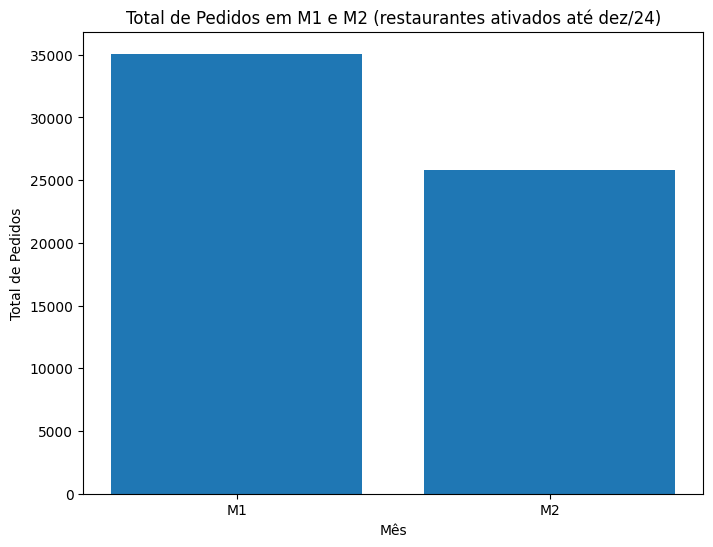

In [150]:
# TOTAL DE PEDIDOS EM M1 E M2 COM RESTAURANTES ATIVADOS ATÉ DEZ/24

## TOTAL DE PEDIDOS EM M1 E M2

total_m1 = ano2024_df['pedidos_m1'].sum()
total_m2 = ano2024_df['pedidos_m2'].sum()

### TAMANHO DO GRAFICO
plt.figure(figsize=(8, 6))

### DADOS DO GRAFICO
meses = ['M1', 'M2']
totais = [total_m1, total_m2]

### CRIACAO DO GRAFICO
plt.bar(meses, totais, width=0.8)

### LABELS
plt.title('Total de Pedidos em M1 e M2 (restaurantes ativados até dez/24)')
plt.xlabel('Mês')
plt.ylabel('Total de Pedidos')

### IMPRESSÃO
plt.show()

**RESTAURANTES COM QUANTIDADE DE PEDIDOS MENOR QUE 10 EM 'PEDIDOS_M1' E PEDIDOS_M2', UTILIZANDO O DATASET CRIADO ANTERIORMENTE COM PEDIDOS_M1 ENTRE JANEIRO E DEZEMBRO DE 2024**

In [151]:
# RESTAURANTES COM QUANTIDADE DE PEDIDOS MENOR QUE 10 EM 'PEDIDOS_M1' E PEDIDOS_M2'
# UTILIZANDO O DATASET CRIADO ANTERIORMENTE COM PEDIDOS_M1 ENTRE JANEIRO E DEZEMBRO DE 2024


## CONTAGEM DE RESTAURANTES COM QUANTIDADE DE PEDIDOS MENOR QUE 10 EM PEDIDOS_M1 E PEDIDOS_M2
M2_e_M1_menor_10 = ano2024_df[(ano2024_df['pedidos_m1'] < 10) & (ano2024_df['pedidos_m2'] < 10) | (ano2024_df['pedidos_m2'] > 1500) & (ano2024_df['pedidos_m1'] > 1500)]


print(M2_e_M1_menor_10.shape[0], "restaurantes com pedidos em M1 e M2 menores que 10, e, ou, maiores que 1500")

64 restaurantes com pedidos em M1 e M2 menores que 10, e, ou, maiores que 1500


**CRIAÇÃO DA BASE DE DADOS A SER ANALISADA**

Exclusão de restaurantes com número de pedidos abaixo de 10, e acima de 1500.

In [152]:
# CRIACAO DA BASE VALIDA PARA SER ANALISADA

## BASE 2024 EXCLUINDO OS RESTAURANTES COM PEDIDOS ABAIXO DE 10
ano2024_validos = ano2024_df[~ano2024_df.index.isin(M2_e_M1_menor_10.index)]

print("Quantidade de Restaurantes na base valida", len(ano2024_validos))

ano2024_validos.head()

Quantidade de Restaurantes na base valida 189


,loja,tipo,Shopping,software,data_assinado,data_entregue,data_primeiro_pedido,Irregular,pedidos_m0,pedidos_m1,pedidos_m2
1,Loja - 02,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-09,2024-07-18,2024-08-14,NaN,101,251,187
2,Loja - 03,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-09,2024-07-18,2024-08-28,NaN,16,71,113
3,Loja - 04,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-10,2024-08-23,2024-09-20,NaN,10,18,19
4,Loja - 05,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-12,2024-07-27,2024-08-29,NaN,20,112,85
5,Loja - 06,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-12,2024-07-27,2024-09-06,NaN,25,21,51


**A QUANTIDADE DE PEDIDOS AUMENTA OU DIMINUI COM O TEMPO DE USO DO TOTEM?**

In [153]:
# A QUANTIDADE DE PEDIDOS AUMENTA OU DIMINUI COM O TEMPO DE USO?

### QUANTIDADE DE RESTAURANTES COM ALTA NOS PEDIDOS - M2 > M1
ano2024_m2alta = ano2024_validos[ano2024_validos['pedidos_m2'] > ano2024_validos['pedidos_m1']]
print(ano2024_m2alta.shape[0], "restaurantes com M2 maior ou igual a M1")

### QUANTIDADE DE RESTAURANTES COM BAIXA NOS PEDIDOS - M2 > M1
M2_em_queda = ano2024_validos[ano2024_validos['pedidos_m2'] < ano2024_validos['pedidos_m1']]
print(M2_em_queda.shape[0], "restaurantes com M2 menor que M1")

### QUANTIDADE DE RESTAURANTES QUE MANTEM A QUANTIDADE DE PEDIDO - M2 = M1

### QUANTIDADE DE RESTAURANTES COM BAIXA NOS PEDIDOS - M2 > M1
M2_igual = ano2024_validos[ano2024_validos['pedidos_m2'] == ano2024_validos['pedidos_m1']]
print(M2_igual.shape[0], "restaurantes com M2 = M1")

75 restaurantes com M2 maior ou igual a M1
113 restaurantes com M2 menor que M1
1 restaurantes com M2 = M1


**CRIAÇÃO DO ATRIBUTO TEMPO DE ATIVAÇÃO**

"Tempo de Ativação" = "data_primeiro_pedido" - "data_assinado"



In [154]:
# CRIAÇÃO DO ATRIBUTO TEMPO DE ATIVAÇÃO

## "Tempo de Ativação" = "data_primeiro_pedido" - "data_assinado"

ano2024_df.loc[:, 'Tempo de Ativação'] = (ano2024_df['data_primeiro_pedido'] - ano2024_df['data_assinado']).dt.days

ano2024_df.head()

<ipython-input-154-955df2a138b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ano2024_df.loc[:, 'Tempo de Ativação'] = (ano2024_df['data_primeiro_pedido'] - ano2024_df['data_assinado']).dt.days


,loja,tipo,Shopping,software,data_assinado,data_entregue,data_primeiro_pedido,Irregular,pedidos_m0,pedidos_m1,pedidos_m2,Tempo de Ativação
0,Loja - 01,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-09,2024-08-19,2024-10-03,NaN,2,0,0,86
1,Loja - 02,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-09,2024-07-18,2024-08-14,NaN,101,251,187,36
2,Loja - 03,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-09,2024-07-18,2024-08-28,NaN,16,71,113,50
3,Loja - 04,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-10,2024-08-23,2024-09-20,NaN,10,18,19,72
4,Loja - 05,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-12,2024-07-27,2024-08-29,NaN,20,112,85,48


**VISUALIZAÇÃO DOS DADOS EM 'TEMPO DE ATIVAÇÃO'**

In [155]:
# RESUMO DE 'TEMPO DE ATIVAÇÃO'

ano2024_df[['Tempo de Ativação', 'pedidos_m1', 'pedidos_m2']].describe()

,Tempo de Ativação,pedidos_m1,pedidos_m2
count,253.000000,253.000000,253.000000
mean,35.505929,138.664032,101.956522
std,21.584022,267.717190,246.863873
min,-84.000000,0.000000,0.000000
25%,25.000000,7.000000,1.000000
50%,34.000000,43.000000,20.000000
75%,47.000000,147.000000,99.000000
max,122.000000,2838.000000,2659.000000


**NORMALIZAÇÃO DOS DADOS E CRIAÇÃO DA BASE DE DADOS A SER UTILIZADA NA ANALISE**

Exclusão dos restaurantes com pedidos abaixo de 10, acima de 1500 e dos restaurantes com tempo de ativação menor que 0.


In [156]:
# NORMALIZAÇÃO DOS DADOS E CRIAÇÃO DA BASE DE DADOS A SER UTILIZADA NA ANALISE

ano2024_validos = ano2024_df[(((ano2024_df['pedidos_m1'] > 10) & (ano2024_df['pedidos_m2'] > 10)) & ((ano2024_df['pedidos_m2'] < 1500) & (ano2024_df['pedidos_m1'] < 1500))) & (ano2024_df['Tempo de Ativação'] > 0)]

## BASE 2024 EXCLUINDO OS RESTAURANTES COM PEDIDOS ABAIXO DE 10
print("Quantidade de Restaurantes na base valida", len(ano2024_validos))

ano2024_validos[['pedidos_m1', 'pedidos_m2', 'Tempo de Ativação']].describe()



Quantidade de Restaurantes na base valida 130


,pedidos_m1,pedidos_m2,Tempo de Ativação
count,130.00000,130.000000,130.000000
mean,215.30000,168.523077,33.192308
std,248.52809,234.552294,15.167333
min,11.00000,11.000000,9.000000
25%,44.25000,35.250000,24.000000
50%,120.00000,81.000000,30.500000
75%,281.50000,190.000000,39.000000
max,1214.00000,1460.000000,96.000000


**GRÁFICO QUE DEMONSTRA O IMPACTO DO TEMPO DE ATIVAÇÃO NOS PEDIDOS**

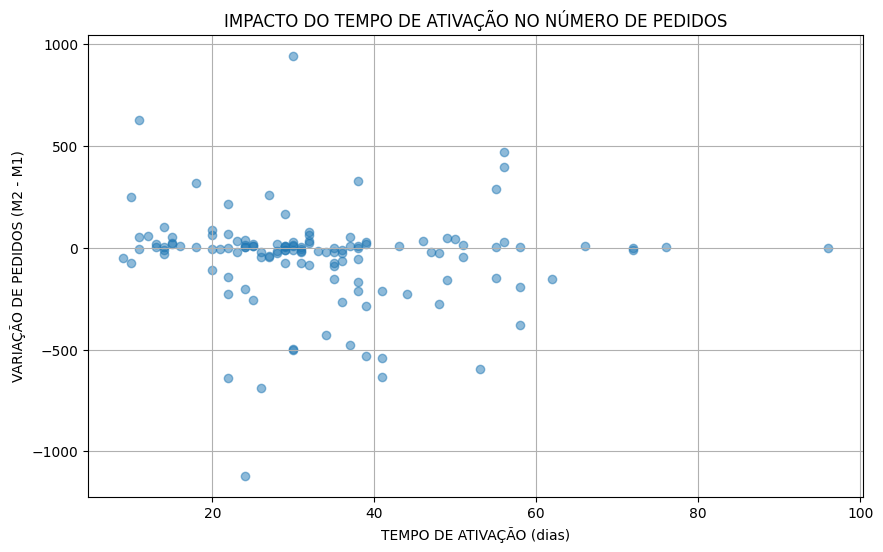

In [158]:
# GRAFICO COM O IMPACTO DO TEMPO DE ATIVAÇÃO NO NUMERO DE PEDIDOS

## CRIAÇÃO DO SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(ano2024_validos['Tempo de Ativação'], ano2024_validos['pedidos_m2'] - ano2024_validos['pedidos_m1'], alpha=0.5)

### LABELS
plt.xlabel('TEMPO DE ATIVAÇÃO (dias)')
plt.ylabel('VARIAÇÃO DE PEDIDOS (M2 - M1)')
plt.title('IMPACTO DO TEMPO DE ATIVAÇÃO NO NÚMERO DE PEDIDOS')

### GRID
plt.grid(True)

### IMPRESSÃO
plt.show()


<ipython-input-164-42fed5b1c449>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ano2024_validos['Tempo de Ativação Grupo'] = pd.cut(ano2024_validos['Tempo de Ativação'], bins=bins, labels=labels, right=False)
<ipython-input-164-42fed5b1c449>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumopedidos2024_validos = ano2024_validos.groupby('Tempo de Ativação Grupo')['pedidos_m1'].count()


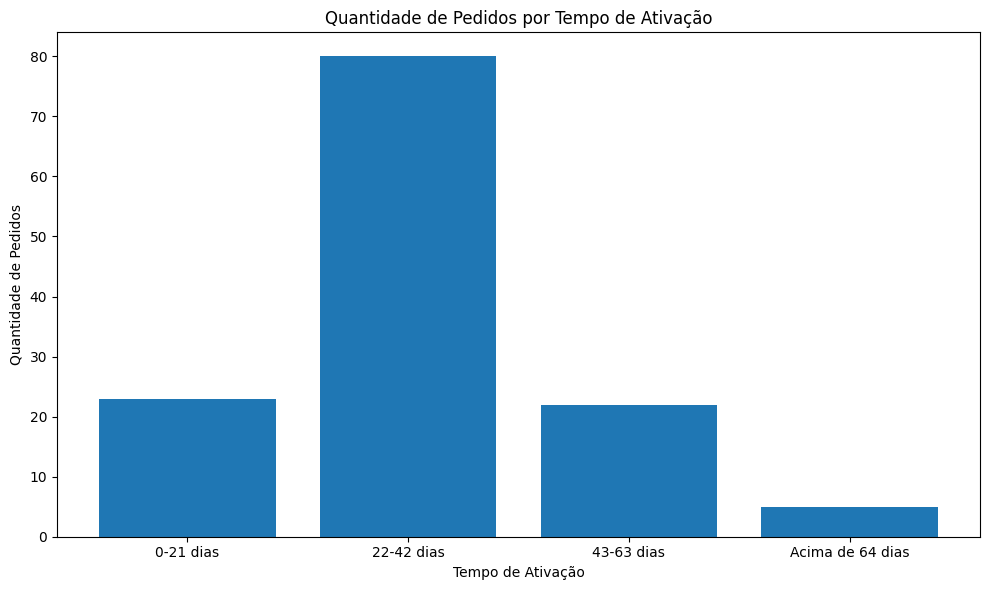

In [164]:
# CRIACAO DAS CATEGORIAS E LABELS
bins = [0, 21, 42, 63, float('inf')]
labels = ['0-21 dias', '22-42 dias', '43-63 dias', 'Acima de 64 dias']
ano2024_validos['Tempo de Ativação Grupo'] = pd.cut(ano2024_validos['Tempo de Ativação'], bins=bins, labels=labels, right=False)

# QUANTIDADE DE PEDIDOS EM CADA GRUPO
resumopedidos2024_validos = ano2024_validos.groupby('Tempo de Ativação Grupo')['pedidos_m1'].count()

# CRIACAO DO GRAFICO DE BARRAS
plt.figure(figsize=(10, 6))
plt.bar(resumopedidos2024_validos.index, resumopedidos2024_validos.values)
plt.xlabel('Tempo de Ativação')
plt.ylabel('Quantidade de Pedidos')
plt.title('Quantidade de Pedidos por Tempo de Ativação')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()
